In [4]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, PrecisionRecallDisplay, average_precision_score

In [5]:
# Creating DataFrames and removing index created during feature_engineering export
X_df_ft1 = pd.read_csv("/workspace/anomaly_lte/data/x_train_processed_ft1.csv")
X_df_ft2 = pd.read_csv("/workspace/anomaly_lte/data/x_train_processed_ft2.csv")
Y_df = pd.read_csv("/workspace/anomaly_lte/data/Y_train.csv")

X_df_ft1 = X_df_ft1.iloc[:,1:]
X_df_ft2 = X_df_ft2.iloc[:,1:]
Y_df = Y_df.iloc[:,1:]

In [6]:
# Obtaining models
with open(f'models/train_dtree_ft1.pkl', 'rb') as model_file:
    dtree_ft1_fold1 = pickle.load(model_file)
    dtree_ft1_fold2 = pickle.load(model_file)
    dtree_ft1_fold3 = pickle.load(model_file)
    dtree_ft1_fold4 = pickle.load(model_file)
    dtree_ft1_fold5 = pickle.load(model_file)

with open(f'models/train_dtree_ft2.pkl', 'rb') as model_file:
    dtree_ft2_fold1 = pickle.load(model_file)
    dtree_ft2_fold2 = pickle.load(model_file)
    dtree_ft2_fold3 = pickle.load(model_file)
    dtree_ft2_fold4 = pickle.load(model_file)
    dtree_ft2_fold5 = pickle.load(model_file)

with open(f'models/train_xgboost_ft1.pkl', 'rb') as model_file:
    xgboost_ft1_fold1 = pickle.load(model_file)
    xgboost_ft1_fold2 = pickle.load(model_file)
    xgboost_ft1_fold3 = pickle.load(model_file)
    xgboost_ft1_fold4 = pickle.load(model_file)
    xgboost_ft1_fold5 = pickle.load(model_file)

with open(f'models/train_xgboost_ft2.pkl', 'rb') as model_file:
    xgboost_ft2_fold1 = pickle.load(model_file)
    xgboost_ft2_fold2 = pickle.load(model_file)
    xgboost_ft2_fold3 = pickle.load(model_file)
    xgboost_ft2_fold4 = pickle.load(model_file)
    xgboost_ft2_fold5 = pickle.load(model_file)

In [7]:
# Creating Stratified Kfold with same random state
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 53)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4275
           1       0.93      0.92      0.92      1630

    accuracy                           0.96      5905
   macro avg       0.95      0.95      0.95      5905
weighted avg       0.96      0.96      0.96      5905



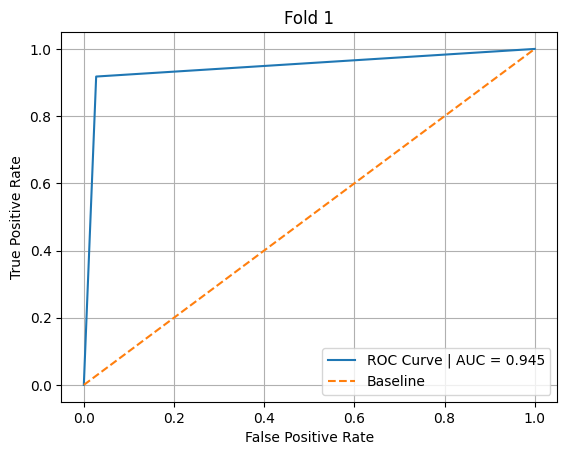

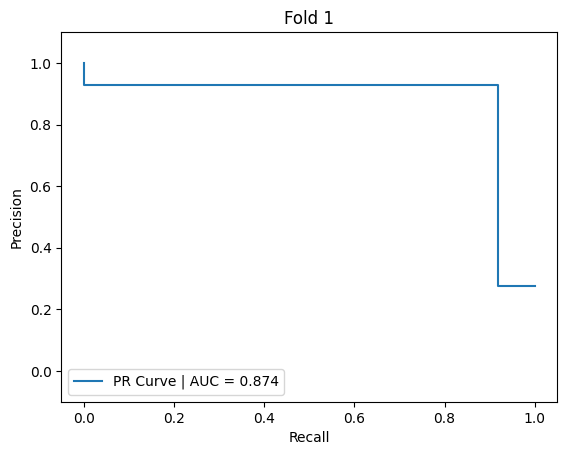

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4275
           1       0.92      0.93      0.93      1630

    accuracy                           0.96      5905
   macro avg       0.95      0.95      0.95      5905
weighted avg       0.96      0.96      0.96      5905



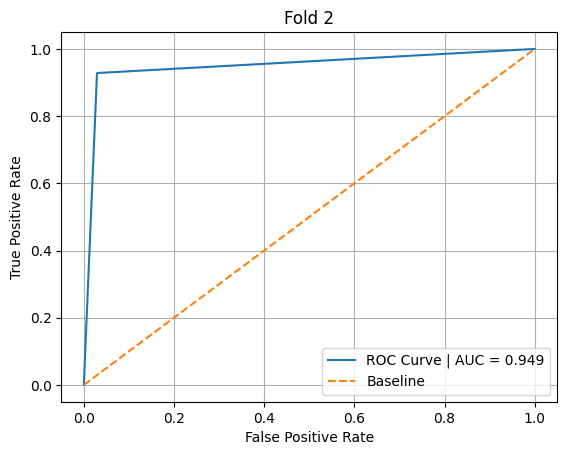

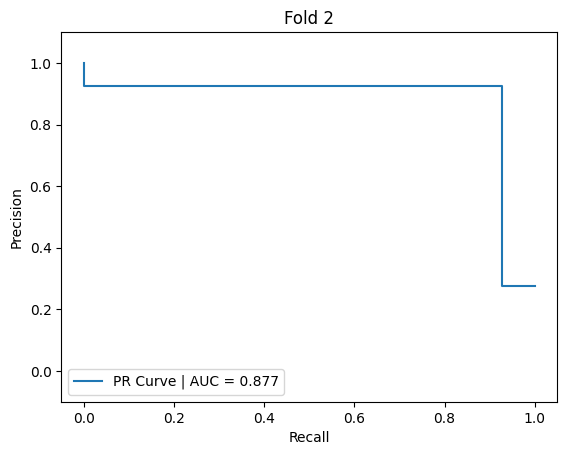

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4274
           1       0.92      0.93      0.92      1630

    accuracy                           0.96      5904
   macro avg       0.94      0.95      0.94      5904
weighted avg       0.96      0.96      0.96      5904



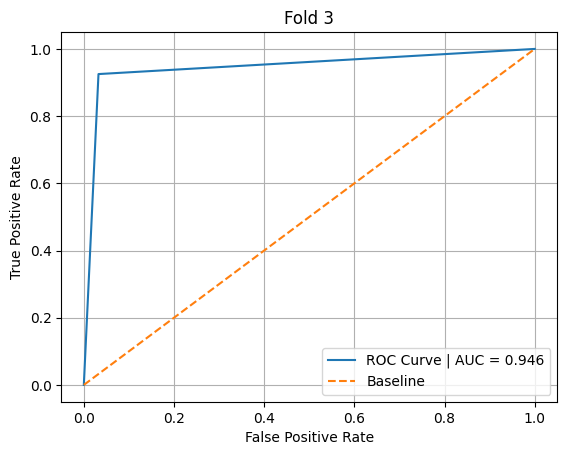

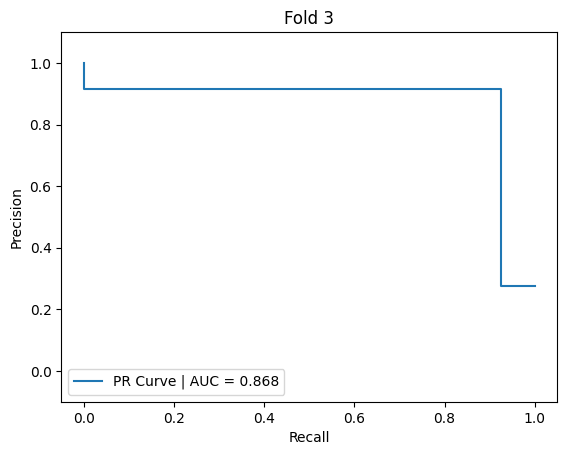

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4275
           1       0.94      0.92      0.93      1629

    accuracy                           0.96      5904
   macro avg       0.96      0.95      0.95      5904
weighted avg       0.96      0.96      0.96      5904



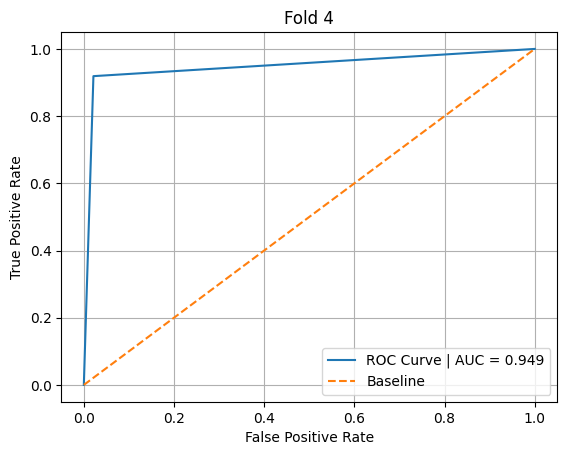

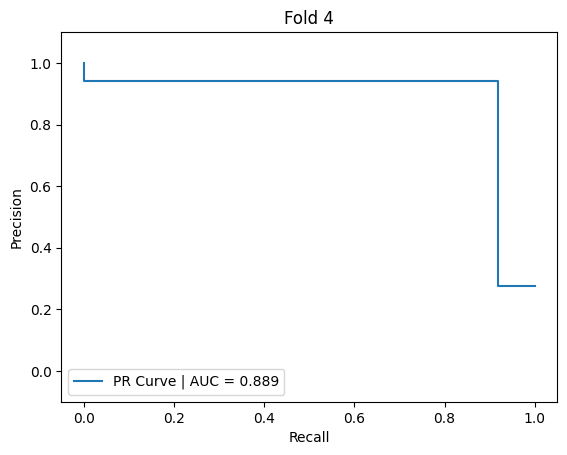

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4275
           1       0.92      0.92      0.92      1629

    accuracy                           0.96      5904
   macro avg       0.95      0.95      0.95      5904
weighted avg       0.96      0.96      0.96      5904



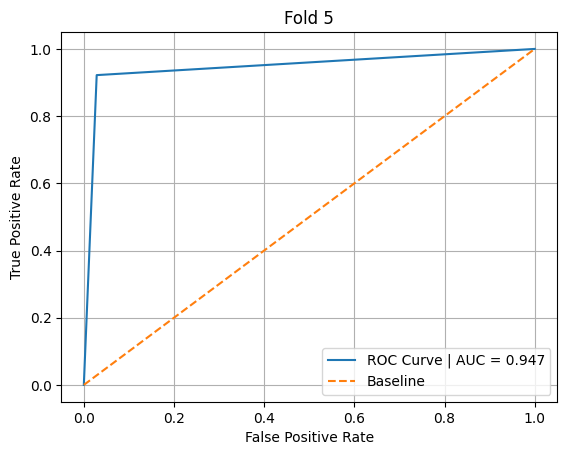

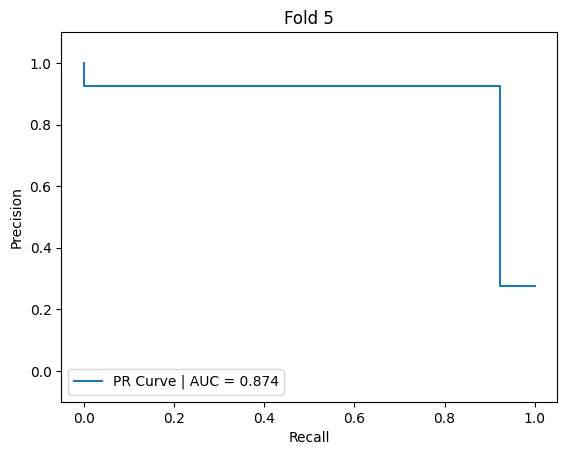

Mean Score: 0.9584716628919041
Mean AUC (ROC): 0.9473217420821112
Mean AUC (PR): 0.8763593825353944
Mean Confusion Matrix: 
[[4156.   118.8]
 [ 126.4 1503.2]]


In [8]:
# Evaluating metrics for decision tree ft1
scores = []
AUC_ROC_List = []
AUC_PR_List = []
Fold = 0
Mean_cm = [[0,0],[0,0]]
cr_List = []

for train_index, test_index in skf.split(X_df_ft1, Y_df):
    Fold += 1
    X_test = X_df_ft1.iloc[test_index]
    Y_test = Y_df.iloc[test_index]
    Predicted = globals()[f"dtree_ft1_fold{Fold}"].predict(X_test)

    # Getting Scores
    score = globals()[f"dtree_ft1_fold{Fold}"].score(X_test,Y_test)
    scores.append(score)

    # Getting confusion matrix
    cm = confusion_matrix(Y_test, Predicted)
    Mean_cm = Mean_cm + cm 

    # Getting ROC Curve
    fpr, tpr, thresholds_ROC = roc_curve(Y_test, Predicted)

    # Getting AUC values
    AUC_ROC = auc(fpr, tpr)
    AUC_ROC_List.append(AUC_ROC)

    # Getting Precision Recall Display
    Precision, Recall, thresholds_PRD = precision_recall_curve(Y_test, Predicted)

    # Getting average precision (AUC)
    AUC_PR = average_precision_score(Y_test, Predicted)
    AUC_PR_List.append(AUC_PR)

    # Printing Classification Report
    cr = classification_report(Y_test, Predicted)   
    print(f"Classification Report for fold {Fold}:\n{cr}")

    # Plotting ROC Curve
    plt.plot(fpr, tpr, label = f"ROC Curve | AUC = {round(AUC_ROC,3)}")
    plt.plot([0,1], [0,1], linestyle = '--', label = "Baseline")
    plt.title(f"Fold {Fold}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.legend()
    plt.show()

    # Plotting Precision Recall Display
    display = PrecisionRecallDisplay(precision = Precision, recall = Recall)
    display.plot(label = f"PR Curve | AUC = {round(AUC_PR,3)}")
    plt.title(f"Fold {Fold}")
    plt.ylim(-0.1,1.1)
    plt.show()
    
# Printing overall evaluation metrics
print(f"Mean Score: {np.mean(scores)}")
print(f"Mean AUC (ROC): {np.mean(AUC_ROC_List)}")
print(f"Mean AUC (PR): {np.mean(AUC_PR_List)}")
print(f"Mean Confusion Matrix: \n{Mean_cm/5}")

Classification Report for fold 1:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4275
           1       0.93      0.92      0.92      1630

    accuracy                           0.96      5905
   macro avg       0.95      0.95      0.95      5905
weighted avg       0.96      0.96      0.96      5905



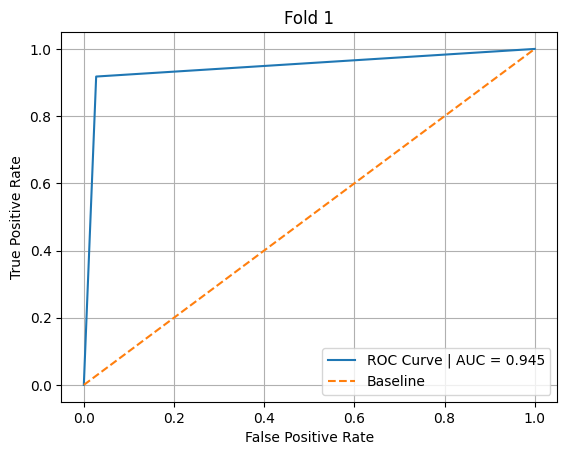

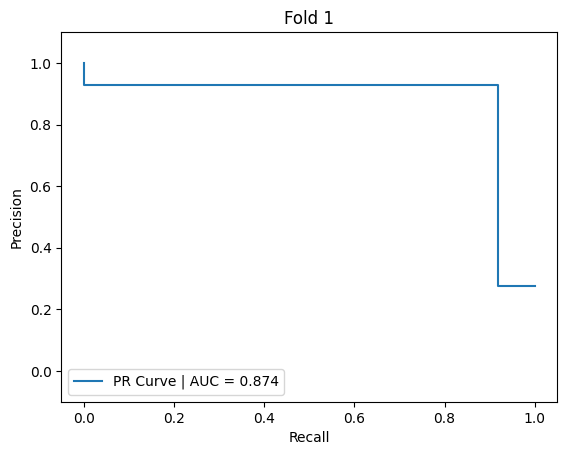

Classification Report for fold 2:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4275
           1       0.92      0.93      0.93      1630

    accuracy                           0.96      5905
   macro avg       0.95      0.95      0.95      5905
weighted avg       0.96      0.96      0.96      5905



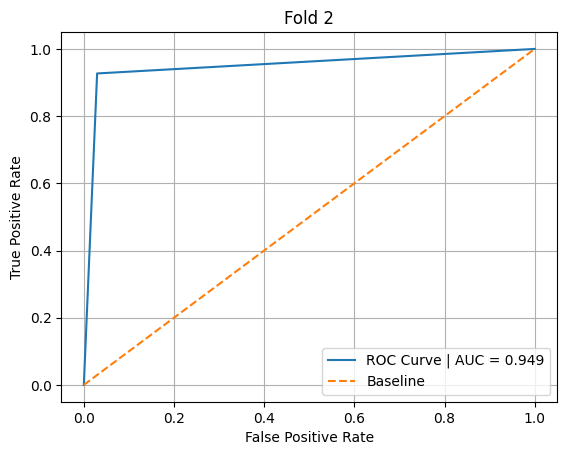

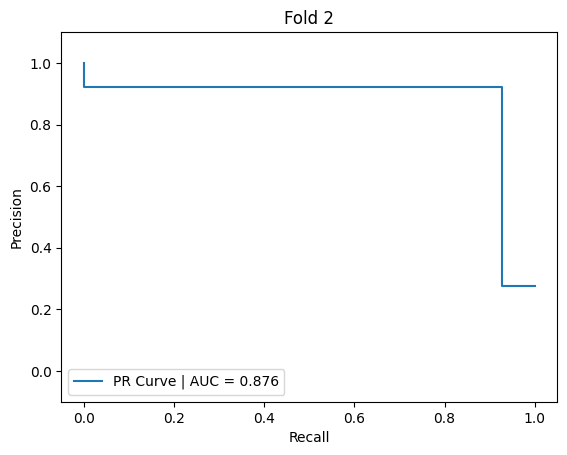

Classification Report for fold 3:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4274
           1       0.92      0.93      0.92      1630

    accuracy                           0.96      5904
   macro avg       0.94      0.95      0.95      5904
weighted avg       0.96      0.96      0.96      5904



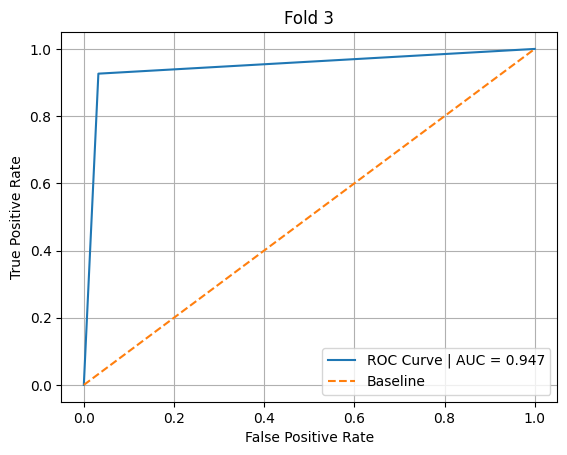

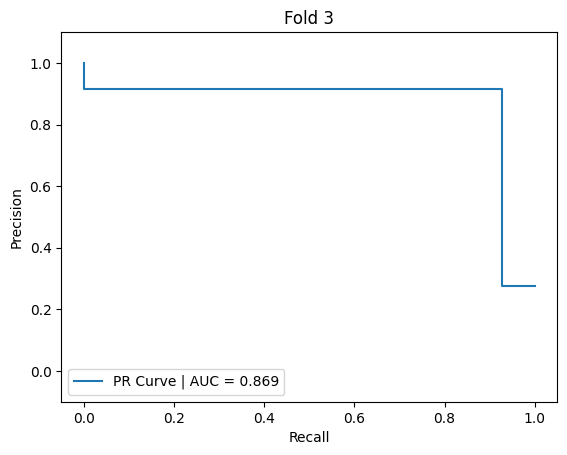

Classification Report for fold 4:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4275
           1       0.94      0.92      0.93      1629

    accuracy                           0.96      5904
   macro avg       0.96      0.95      0.95      5904
weighted avg       0.96      0.96      0.96      5904



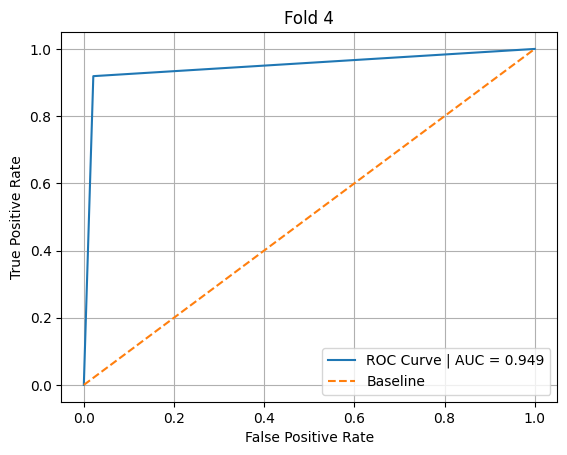

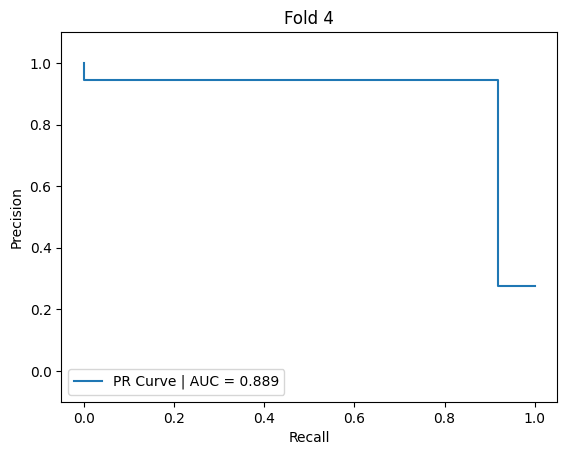

Classification Report for fold 5:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4275
           1       0.92      0.92      0.92      1629

    accuracy                           0.96      5904
   macro avg       0.95      0.95      0.95      5904
weighted avg       0.96      0.96      0.96      5904



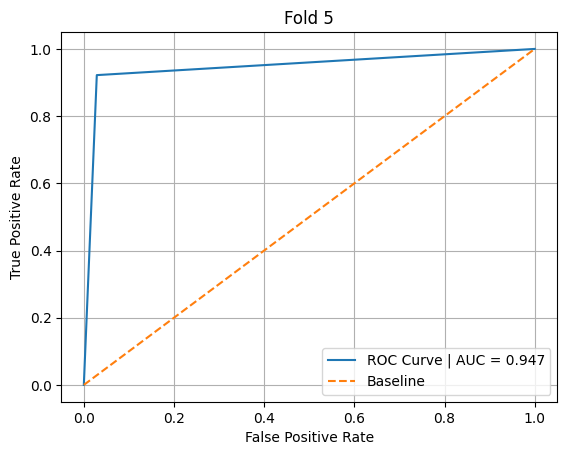

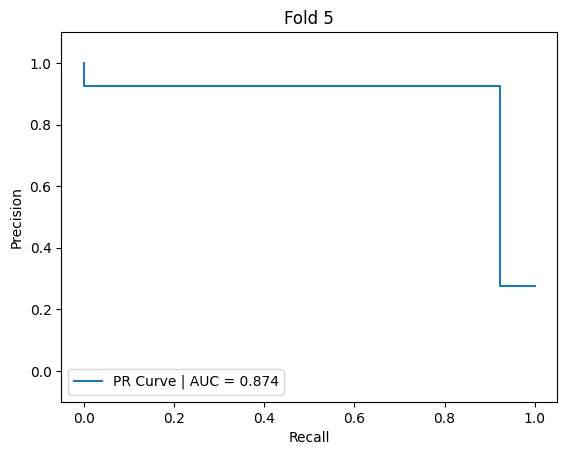

Mean Score: 0.9584716801020677
Mean AUC (ROC): 0.9473217475551605
Mean AUC (PR): 0.8763616213822691
Mean Confusion Matrix: 
[[4156.   118.8]
 [ 126.4 1503.2]]


In [12]:
# Evaluating metrics for decision tree ft2
scores = []
AUC_ROC_List = []
AUC_PR_List = []
Fold = 0
Mean_cm = [[0,0],[0,0]]
cr_List = []

for train_index, test_index in skf.split(X_df_ft2, Y_df):
    Fold += 1
    X_test = X_df_ft2.iloc[test_index]
    Y_test = Y_df.iloc[test_index]
    Predicted = globals()[f"dtree_ft2_fold{Fold}"].predict(X_test)

    # Getting Scores
    score = globals()[f"dtree_ft2_fold{Fold}"].score(X_test,Y_test)
    scores.append(score)

    # Getting confusion matrix
    cm = confusion_matrix(Y_test, Predicted)
    Mean_cm = Mean_cm + cm 

    # Getting ROC Curve
    fpr, tpr, thresholds_ROC = roc_curve(Y_test, Predicted)

    # Getting AUC values
    AUC_ROC = auc(fpr, tpr)
    AUC_ROC_List.append(AUC_ROC)

    # Getting Precision Recall Display
    Precision, Recall, thresholds_PRD = precision_recall_curve(Y_test, Predicted)

    # Getting average precision (AUC)
    AUC_PR = average_precision_score(Y_test, Predicted)
    AUC_PR_List.append(AUC_PR)

    # Printing Classification Report
    cr = classification_report(Y_test, Predicted)   
    print(f"Classification Report for fold {Fold}:\n{cr}")

    # Plotting ROC Curve
    plt.plot(fpr, tpr, label = f"ROC Curve | AUC = {round(AUC_ROC,3)}")
    plt.plot([0,1], [0,1], linestyle = '--', label = "Baseline")
    plt.title(f"Fold {Fold}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.legend()
    plt.show()

    # Plotting Precision Recall Display
    display = PrecisionRecallDisplay(precision = Precision, recall = Recall)
    display.plot(label = f"PR Curve | AUC = {round(AUC_PR,3)}")
    plt.title(f"Fold {Fold}")
    plt.ylim(-0.1,1.1)
    plt.show()
    
# Printing overall evaluation metrics
print(f"Mean Score: {np.mean(scores)}")
print(f"Mean AUC (ROC): {np.mean(AUC_ROC_List)}")
print(f"Mean AUC (PR): {np.mean(AUC_PR_List)}")
print(f"Mean Confusion Matrix: \n{Mean_cm/5}")

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Classification Report for fold 1:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4275
           1       1.00      0.95      0.97      1630

    accuracy                           0.99      5905
   macro avg       0.99      0.98      0.98      5905
weighted avg       0.99      0.99      0.99      5905



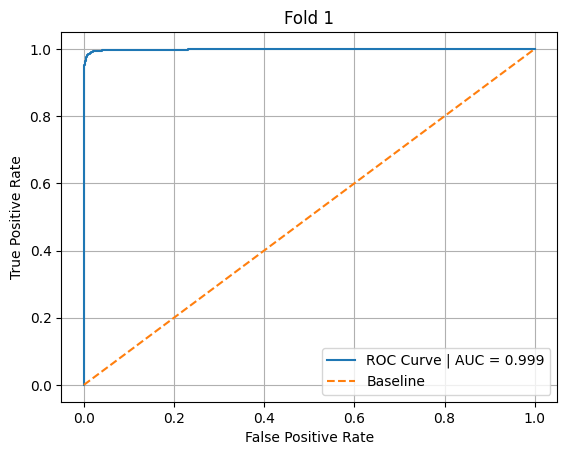

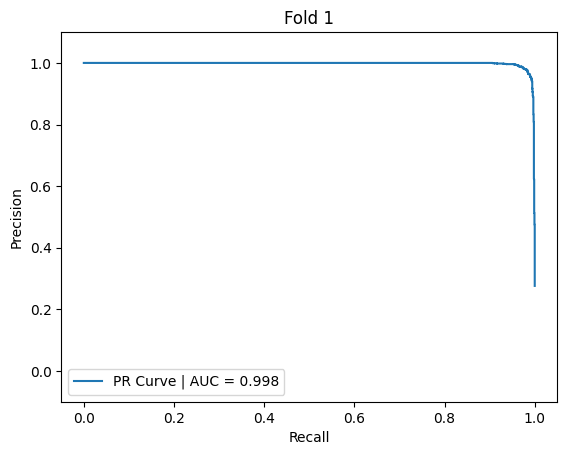

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Classification Report for fold 2:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4275
           1       0.99      0.95      0.97      1630

    accuracy                           0.99      5905
   macro avg       0.99      0.98      0.98      5905
weighted avg       0.99      0.99      0.99      5905



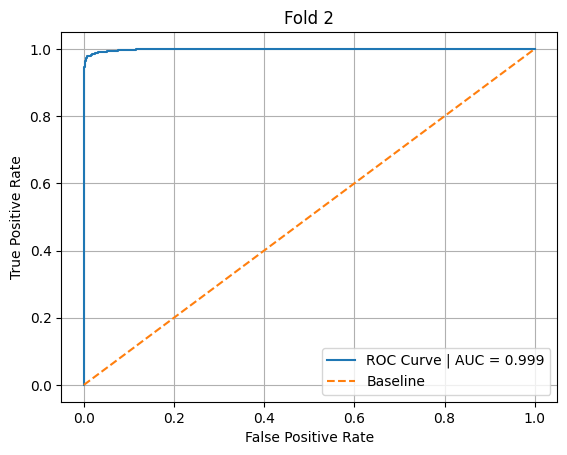

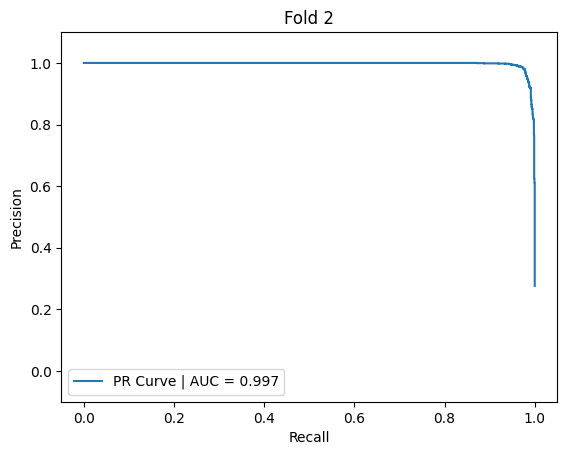

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Classification Report for fold 3:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4274
           1       0.99      0.95      0.97      1630

    accuracy                           0.99      5904
   macro avg       0.99      0.98      0.98      5904
weighted avg       0.99      0.99      0.99      5904



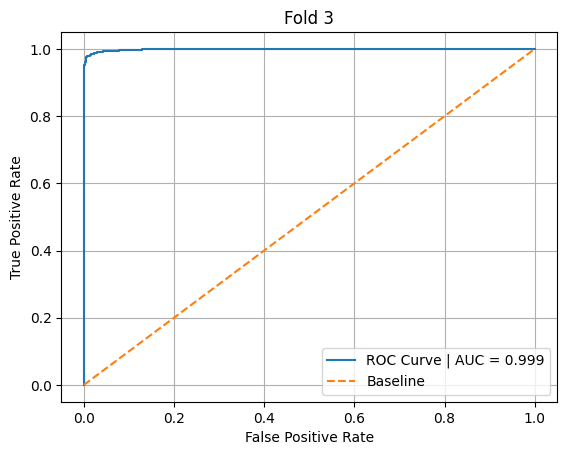

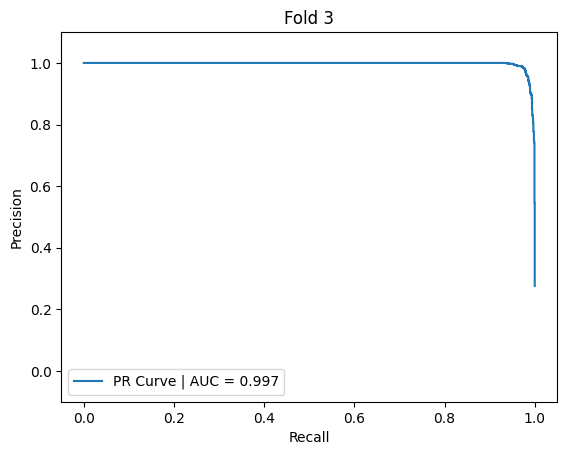

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Classification Report for fold 4:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4275
           1       0.99      0.95      0.97      1629

    accuracy                           0.98      5904
   macro avg       0.99      0.97      0.98      5904
weighted avg       0.98      0.98      0.98      5904



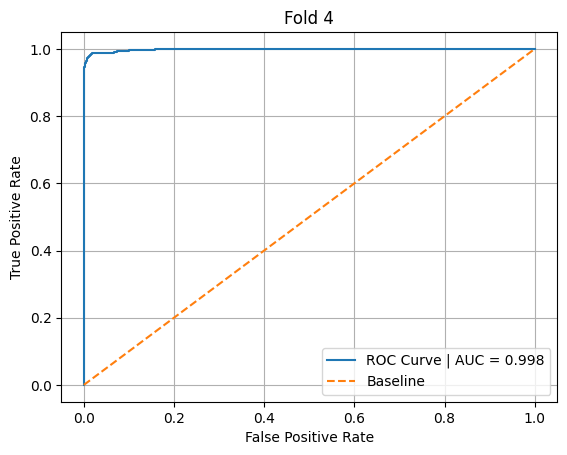

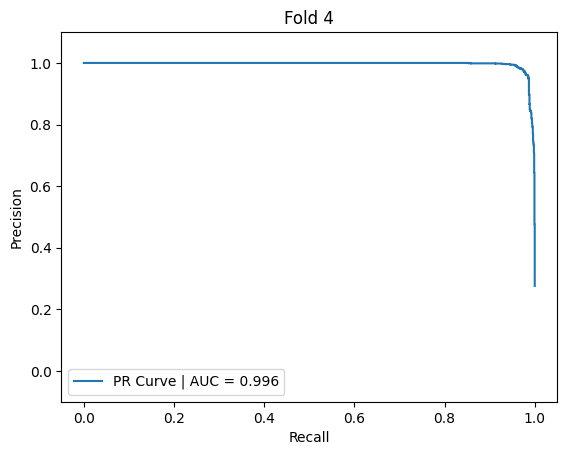

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Classification Report for fold 5:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4275
           1       0.99      0.95      0.97      1629

    accuracy                           0.98      5904
   macro avg       0.99      0.97      0.98      5904
weighted avg       0.98      0.98      0.98      5904



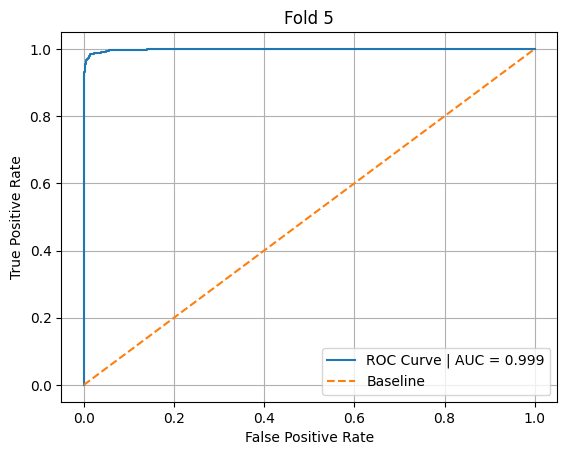

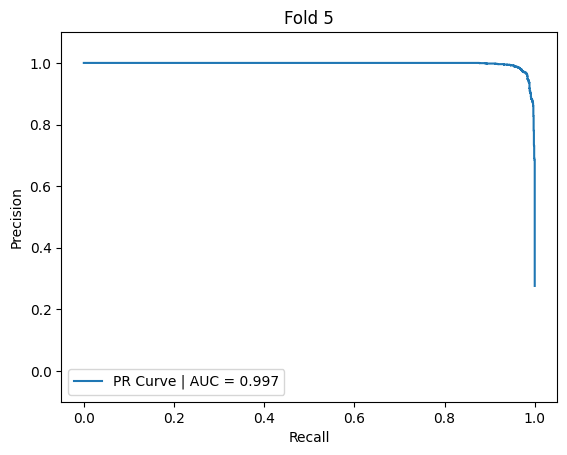

Mean Score: 0.9849941887014129
Mean AUC (ROC): 0.9986486692933202
Mean AUC (PR): 0.9971343018658292
Mean Confusion Matrix: 
[[4265.6    9.2]
 [  79.4 1550.2]]


In [20]:
# Evaluation metrics for xgboost ft1
scores = []
AUC_ROC_List = []
AUC_PR_List = []
Fold = 0
Mean_cm = [[0,0],[0,0]]
cr_List = []

for train_index, test_index in skf.split(X_df_ft1, Y_df):
    Fold += 1
    X_test = X_df_ft1.iloc[test_index]
    Y_test = Y_df.iloc[test_index]
    Predicted = globals()[f"xgboost_ft1_fold{Fold}"].predict(X_test)
    Predicted_Probability = globals()[f"xgboost_ft1_fold{Fold}"].predict_proba(X_test)[:,1]

    # Getting Scores
    score = globals()[f"xgboost_ft1_fold{Fold}"].score(X_test,Y_test)
    scores.append(score)

    # Getting confusion matrix
    cm = confusion_matrix(Y_test, Predicted)
    Mean_cm = Mean_cm + cm 

    # Getting ROC Curve
    fpr, tpr, thresholds_ROC = roc_curve(Y_test, Predicted_Probability)

    # Getting AUC values
    AUC_ROC = auc(fpr, tpr)
    AUC_ROC_List.append(AUC_ROC)

    # Getting Precision Recall Display
    Precision, Recall, thresholds_PRD = precision_recall_curve(Y_test, Predicted_Probability)

    # Getting average precision (AUC)
    AUC_PR = average_precision_score(Y_test, Predicted_Probability)
    AUC_PR_List.append(AUC_PR)

    # Printing Classification Report
    cr = classification_report(Y_test, Predicted)   
    print(f"Classification Report for fold {Fold}:\n{cr}")

    # Plotting ROC Curve
    plt.plot(fpr, tpr, label = f"ROC Curve | AUC = {round(AUC_ROC,3)}")
    plt.plot([0,1], [0,1], linestyle = '--', label = "Baseline")
    plt.title(f"Fold {Fold}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.legend()
    plt.show()

    # Plotting Precision Recall Display
    display = PrecisionRecallDisplay(precision = Precision, recall = Recall)
    display.plot(label = f"PR Curve | AUC = {round(AUC_PR,3)}")
    plt.title(f"Fold {Fold}")
    plt.ylim(-0.1,1.1)
    plt.show()
    
# Printing overall evaluation metrics
print(f"Mean Score: {np.mean(scores)}")
print(f"Mean AUC (ROC): {np.mean(AUC_ROC_List)}")
print(f"Mean AUC (PR): {np.mean(AUC_PR_List)}")
print(f"Mean Confusion Matrix: \n{Mean_cm/5}")

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Classification Report for fold 1:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4275
           1       1.00      0.95      0.97      1630

    accuracy                           0.99      5905
   macro avg       0.99      0.98      0.98      5905
weighted avg       0.99      0.99      0.99      5905



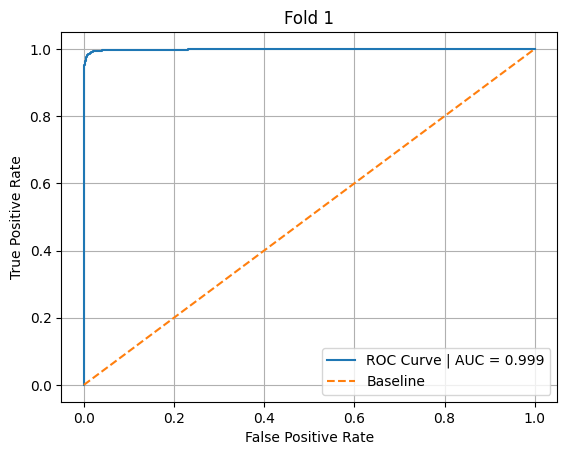

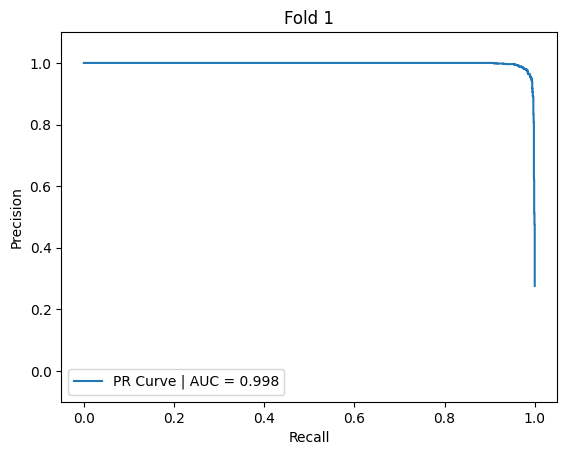

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Classification Report for fold 2:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4275
           1       0.99      0.95      0.97      1630

    accuracy                           0.99      5905
   macro avg       0.99      0.98      0.98      5905
weighted avg       0.99      0.99      0.99      5905



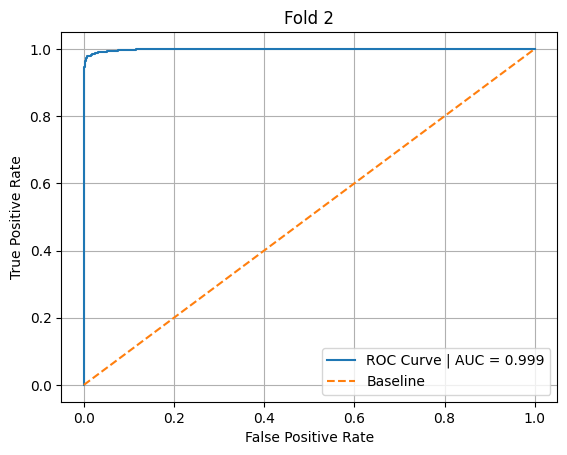

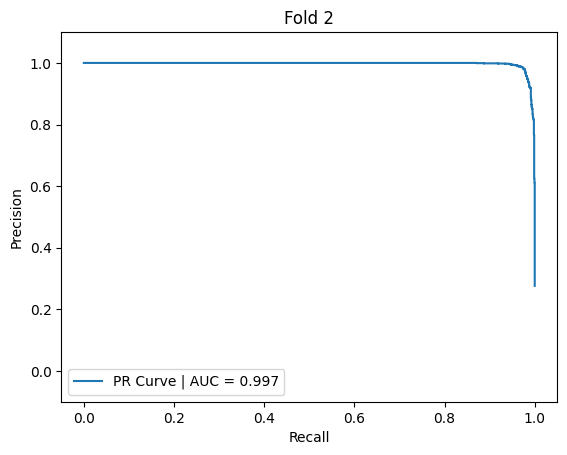

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Classification Report for fold 3:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4274
           1       0.99      0.95      0.97      1630

    accuracy                           0.99      5904
   macro avg       0.99      0.98      0.98      5904
weighted avg       0.99      0.99      0.99      5904



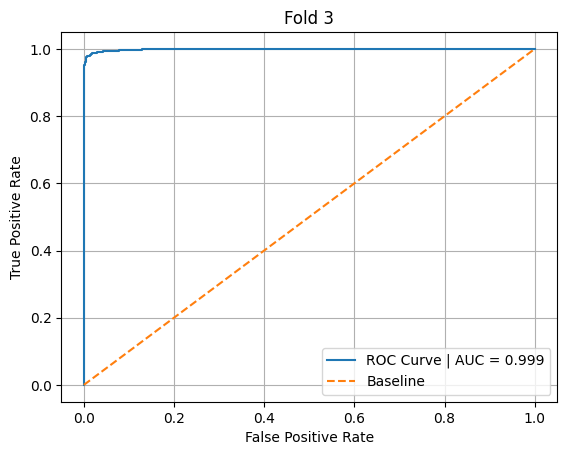

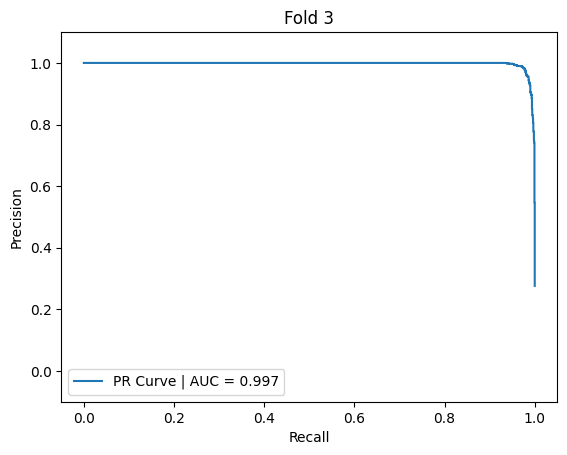

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Classification Report for fold 4:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4275
           1       0.99      0.95      0.97      1629

    accuracy                           0.98      5904
   macro avg       0.99      0.97      0.98      5904
weighted avg       0.98      0.98      0.98      5904



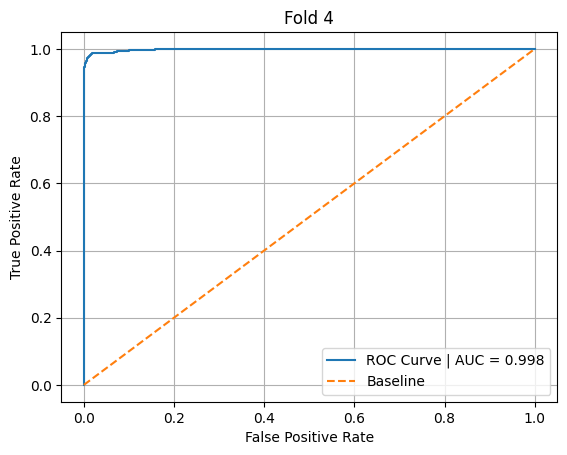

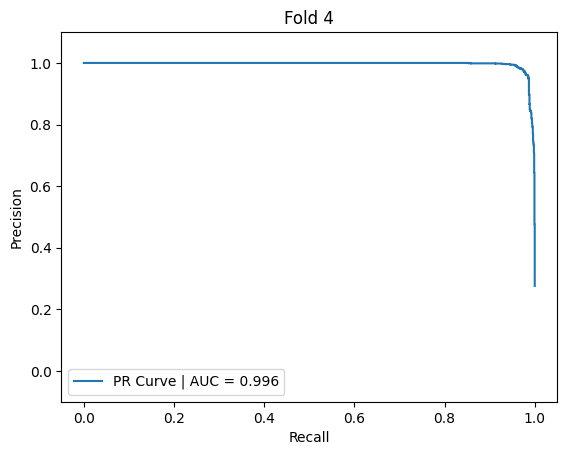

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Classification Report for fold 5:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4275
           1       0.99      0.95      0.97      1629

    accuracy                           0.98      5904
   macro avg       0.99      0.97      0.98      5904
weighted avg       0.98      0.98      0.98      5904



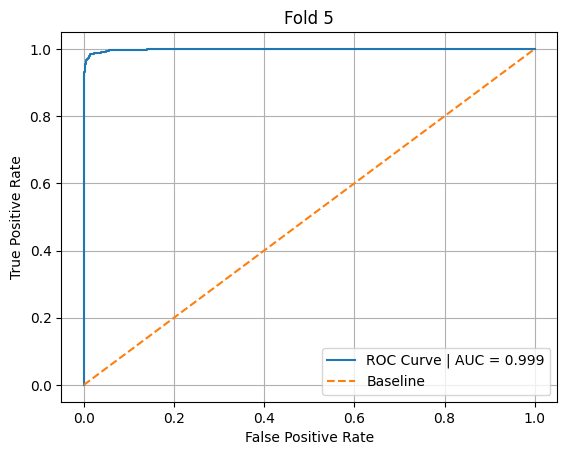

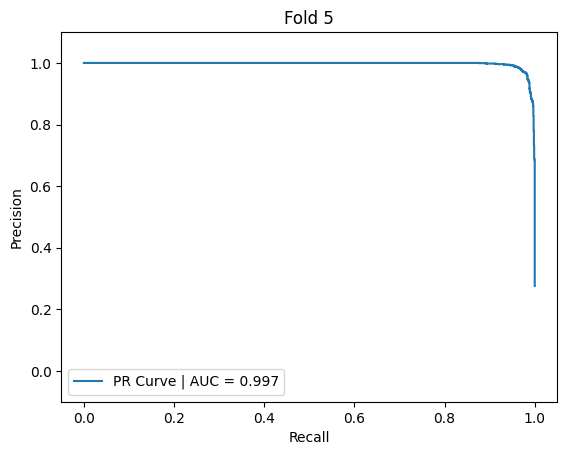

Mean Score: 0.9849941887014129
Mean AUC (ROC): 0.9986515113740065
Mean AUC (PR): 0.9971408711301553
Mean Confusion Matrix: 
[[4265.6    9.2]
 [  79.4 1550.2]]


In [22]:
# Evaluation metrics for xgboost ft2
scores = []
AUC_ROC_List = []
AUC_PR_List = []
Fold = 0
Mean_cm = [[0,0],[0,0]]
cr_List = []

for train_index, test_index in skf.split(X_df_ft2, Y_df):
    Fold += 1
    X_test = X_df_ft2.iloc[test_index]
    Y_test = Y_df.iloc[test_index]
    Predicted = globals()[f"xgboost_ft2_fold{Fold}"].predict(X_test)
    Predicted_Probability = globals()[f"xgboost_ft2_fold{Fold}"].predict_proba(X_test)[:,1]


    # Getting Scores
    score = globals()[f"xgboost_ft2_fold{Fold}"].score(X_test,Y_test)
    scores.append(score)

    # Getting confusion matrix
    cm = confusion_matrix(Y_test, Predicted)
    Mean_cm = Mean_cm + cm 

    # Getting ROC Curve
    fpr, tpr, thresholds_ROC = roc_curve(Y_test, Predicted_Probability)

    # Getting AUC values
    AUC_ROC = auc(fpr, tpr)
    AUC_ROC_List.append(AUC_ROC)

    # Getting Precision Recall Display
    Precision, Recall, thresholds_PRD = precision_recall_curve(Y_test, Predicted_Probability)

    # Getting average precision (AUC)
    AUC_PR = average_precision_score(Y_test, Predicted_Probability)
    AUC_PR_List.append(AUC_PR)

    # Printing Classification Report
    cr = classification_report(Y_test, Predicted)   
    print(f"Classification Report for fold {Fold}:\n{cr}")

    # Plotting ROC Curve
    plt.plot(fpr, tpr, label = f"ROC Curve | AUC = {round(AUC_ROC,3)}")
    plt.plot([0,1], [0,1], linestyle = '--', label = "Baseline")
    plt.title(f"Fold {Fold}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.legend()
    plt.show()

    # Plotting Precision Recall Display
    display = PrecisionRecallDisplay(precision = Precision, recall = Recall)
    display.plot(label = f"PR Curve | AUC = {round(AUC_PR,3)}")
    plt.title(f"Fold {Fold}")
    plt.ylim(-0.1,1.1)
    plt.show()
    
# Printing overall evaluation metrics
print(f"Mean Score: {np.mean(scores)}")
print(f"Mean AUC (ROC): {np.mean(AUC_ROC_List)}")
print(f"Mean AUC (PR): {np.mean(AUC_PR_List)}")
print(f"Mean Confusion Matrix: \n{Mean_cm/5}")